# Aprendizaje Automático - Proyecto Final
## Regresión Logística

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import scipy.optimize as opt

pd.options.mode.chained_assignment = None

import plot_functions as plt_f

from sklearn.preprocessing import PolynomialFeatures

import os

Leemos el archivo:

In [2]:
dt = pd.read_csv("heart.csv")
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Hacemos una traducción al español de los valores del dataset.

In [3]:
dt.columns = ['edad', 'sexo', 'dolor', 
              'tension', 'colesterol', 'glucemia', 
              'ecg', 'frec_cardiaca', 'angina_ej', 
              'depresion_st', 'pendiente_st', 
              'num_valvulas', 'test_talio', 
              'enfermedad']

dt.head()

,edad,sexo,dolor,tension,colesterol,glucemia,ecg,frec_cardiaca,angina_ej,depresion_st,pendiente_st,num_valvulas,test_talio,enfermedad
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Preparamos el modelo para la regresión logística

En primer lugar definiremos las funciones necesarias para realizar la regresión logistica. Estas son la función **sigmoide** (g), la de **coste** y la de **gradiente**. Para extender el experimento definiremos también aquellas **coste_reg** y **gradiente_reg** para la regresión logística regularizada.

In [4]:
# Sigmoide
def g(z):
    return 1 / (1 + np.exp(-z))

def coste(Theta, X, y):
    m = np.shape(X)[0]
    #auxTheta = np.reshape(Theta, (np.shape(Theta)[0], 1))
    Aux = (np.log(g(X @ Theta))).T @ y
    Aux += (np.log(1 - g(X @ Theta))).T @ (1 - y)
    return -Aux / m

def gradiente(Theta, X, y):
    m = np.shape(X)[0]
    #auxTheta = np.reshape(Theta, (np.shape(Theta)[0], 1))
    Aux = X.T @ (g(X @ Theta) - y)
    return Aux / m

def coste_reg(Theta, X, y, Lambda):
    m = np.shape(X)[0]
    Aux = (np.log(g(X @ Theta))).T @ y
    Aux += (np.log(1 - g(X @ Theta))).T @ (1 - y)
    Cost = -Aux / m
    Regcost = (Lambda / (2 * m)) * sum(Theta ** 2)
    return Cost + Regcost 

def gradiente_reg(Theta, X, y, Lambda):
    m = np.shape(X)[0]
    Aux = X.T @ (g(X @ Theta) - y)
    Grad = Aux / m
    theta_aux = Theta
    theta_aux[0] = 0.0
    Grad = Grad + (Lambda / m) * theta_aux
    return Grad

Ahora, definimos una funcion para realizar la regresión logística que recibe la **base de datos (dt)**, los **atributos a estudiar** para formar la X y la **Y**. Los atributos deben ser dos de los siguientes: 'edad', 'sexo', 'dolor', 'tension', 'colesterol', 'glucemia', 'ecg', 'frec_cardiaca', 'angina_ej', 'depresion_st', 'pendiente_st', 'num_valvulas' o 'test_talio'.

Esta función realizará la regresión y mostrará los resultados en gráficas.

In [5]:
def LogisticRegresion(dt, attribute0, attribute1, y):
    attributeList = dt.columns.values.tolist()
    attributeList.remove(attribute0)
    attributeList.remove(attribute1)

    X_data = dt.drop(attributeList, axis = 1)
    X_data.to_csv('X_data.csv', header=False, index=False)
    X_data = pd.read_csv('X_data.csv', header=None)
    os.remove('X_data.csv')

    X = X_data.values

    m = np.shape(X)[0]
    X_ones = np.hstack([np.ones([m, 1]), X])
    n = np.shape(X_ones)[1]

    Theta = np.zeros(n)

    result = opt.fmin_tnc(func=coste, x0=Theta, fprime=gradiente, args=(X_ones, y))
    theta_opt = result[0]

    # Print
    plt_f.plot_frontier(theta_opt, X, y)
    plt_f.plot_frontier_3D(theta_opt, X, y)
    plt_f.accuracy_percentage(theta_opt, X_ones, y)
    print("\n")

De un modo similar, definimos la función para realizar la regresión logística regularizada, por lo que recebirá, además de los parámetros listados anteriormente, el valor de **Lambda**.

In [6]:
def LogisticRegresionReg(dt, attribute0, attribute1, y, Lambda):
    attributeList = dt.columns.values.tolist()
    attributeList.remove(attribute0)
    attributeList.remove(attribute1)

    X_data = dt.drop(attributeList, axis = 1)
    X_data.to_csv('X_data.csv', header=False, index=False)
    X_data = pd.read_csv('X_data.csv', header=None)
    os.remove('X_data.csv')

    X = X_data.values

    m = np.shape(X)[0]
    poly = PolynomialFeatures(degree=6)
    X_reg = poly.fit_transform(X)
    n = np.shape(X_reg)[1]

    Theta = np.zeros(n)

    result = opt.fmin_tnc(func=coste_reg, x0=Theta, fprime=gradiente_reg, args=(X_reg, y, Lambda))
    theta_opt = result[0]

    # Print
    plt_f.plot_decisionboundary(theta_opt, X, y, poly)
    plt_f.plot_decisionboundary_3D(theta_opt, X, y, poly)
    print("\n")

Para la y siempre tomaremos el valor del atributo **'enfermedad'** de la base de datos, de la siguiente manera:

In [7]:
y = dt.enfermedad.values
y = np.reshape(y, (np.shape(y)[0], 1)).astype(float).ravel()

Para probar el algorítmo, realizaremos una regresión logística con los atributos **'edad'** y **'tension'**.

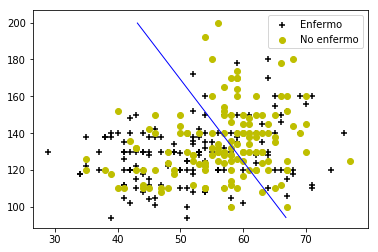

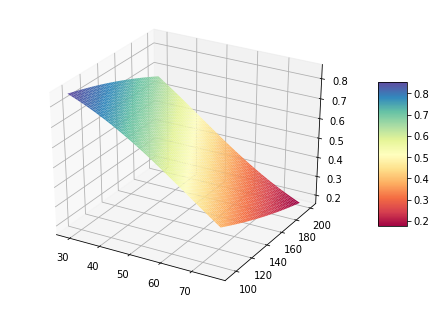

87.27272727272727% of positives accuracy.
84.78260869565217% of negatives accuracy.




In [8]:
LogisticRegresion(dt, 'edad', 'tension', y)

Del mismo modo, realizaremos una regresión logística con los atributos **'edad'** y **'colesterol'**, para comparar los diferentes resultados.

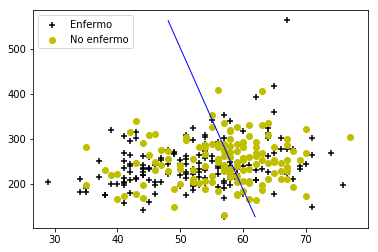

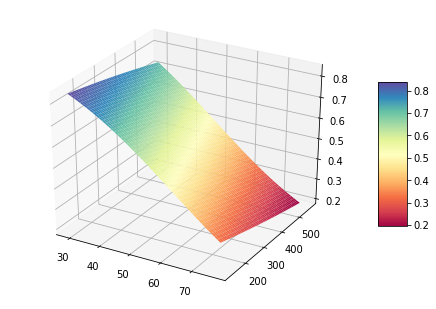

83.63636363636364% of positives accuracy.
80.43478260869566% of negatives accuracy.




In [9]:
LogisticRegresion(dt, 'edad', 'colesterol', y)

Ahora realizaremos una regresión logística regularizada, de nuevo con **'edad'** y **'tension'** pero con **Lambda = 1.0**.